# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['CompPrice','Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [25]:
target = data['Sales']

1) 변수의 비즈니스 의미

> 각 지역 판매액(단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [26]:
target.isnull().sum()

0

4) 기초통계량(수치화)

In [27]:
target.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

5) 분포 확인(시각화)

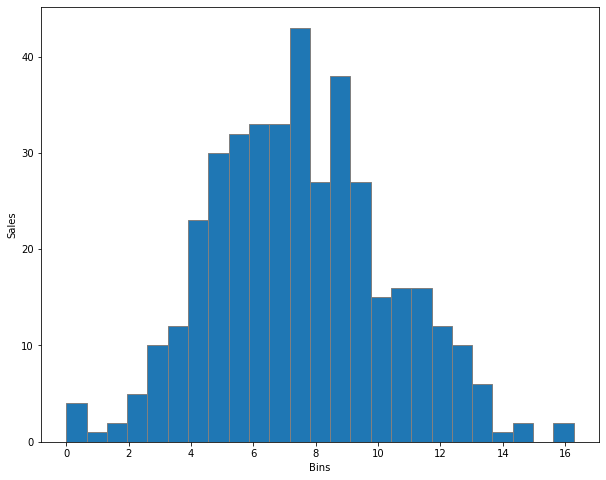

In [28]:
plt.figure(figsize=(10, 8))
plt.hist(target, bins = 25, edgecolor = 'gray')
plt.xlabel('Bins')
plt.ylabel('Sales')
plt.show()

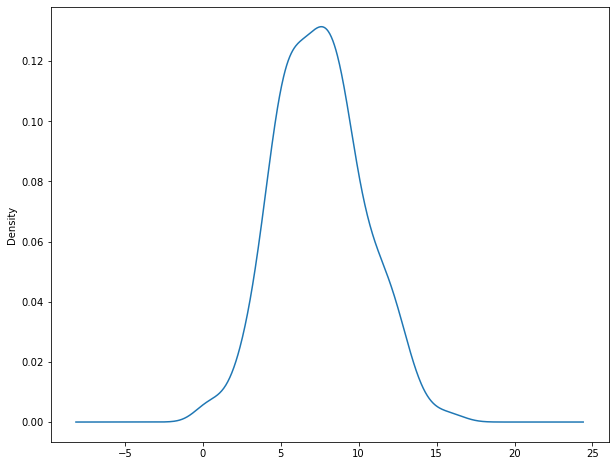

In [29]:
plt.figure(figsize=(10, 8))
target.plot(kind = 'kde')
plt.show()

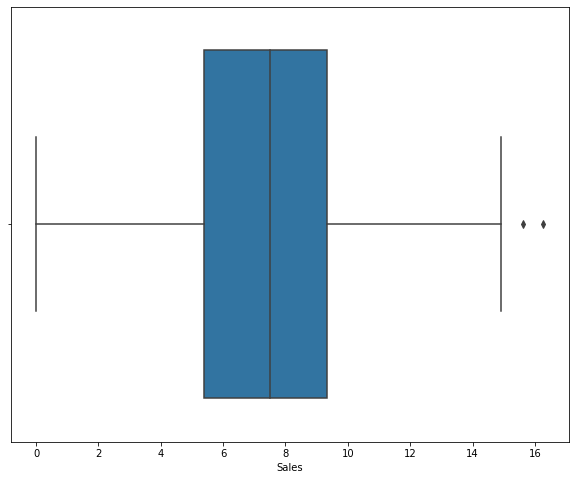

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=target, data=data)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 정규분포 형태로 지역별 평균적으로 약 7000 달러 판매액이 나오고 있다.
> - 판매액이 정규분포 형태이기 때문에 이 회사의 카시트가 안정적으로 판매가 이루어지고 있다고 볼 수 있다.
> - 상자그림에서 울타리를 넘어가는 2개의 이상치가 발견되는데, 카시트가 가장 많이 팔리는 두 지역일 것이다. 
> - 가장 많이 팔리는 지역은 영유아들이 많은 지역일 것이다.
> - 또는 카시트의 규제를 많이 받는 지역일 것이다.

7) 추가 분석해 볼 사항이 있나요?

> - 카시트가 가장 많이 팔리는 지역의 연령대가 어떻게 구성되어 있는지 알아본다.

### 2) Advertising

In [34]:
feature = data['Advertising']

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [35]:
feature.isnull().sum()

0

4) 기초통계량(수치화)

In [36]:
feature.describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

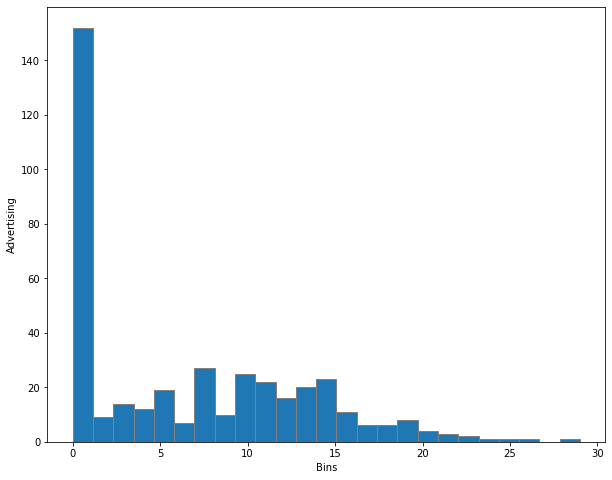

In [40]:
plt.figure(figsize=(10, 8))
plt.hist(feature, bins = 25, edgecolor = 'gray')
plt.xlabel('Bins')
plt.ylabel('Advertising')
plt.show()

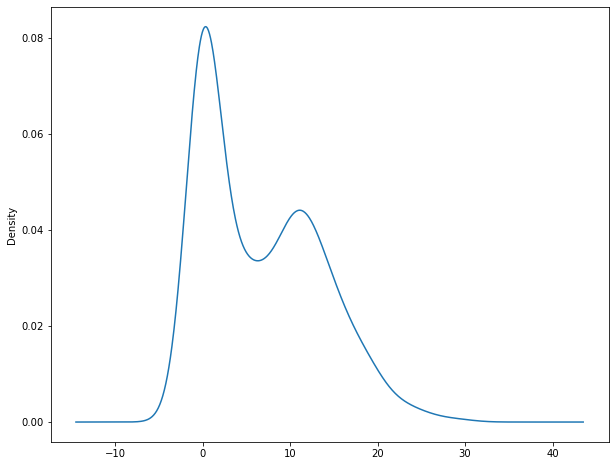

In [38]:
plt.figure(figsize=(10, 8))
feature.plot(kind = 'kde')
plt.show()

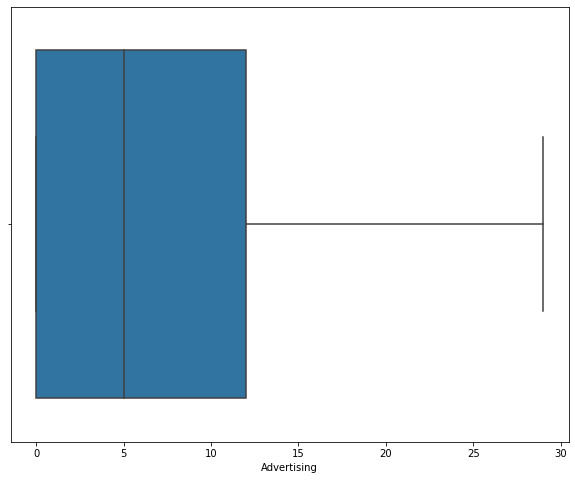

In [39]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=feature, data=data)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 광고 예산이 없는 지역이 대부분이다.
> - 광고를 하지 않아도 판매액이 정규분포 형태로 안정적으로 나온다는 것은 이미 대중에게 보편적으로 카시트는 이 회사라는 인식이 있기 때문일 것이다.
> - 오른쪽으로 꼬리가 긴 분포이다. 
> - 광고비를 많이 들이는 지역도 있다.
> - -> 그 지역은 다른 회사의 카시트가 1위를 하고 있을 수도 있다.


7) 추가 분석해 볼 사항이 있나요?

> * 광고비를 들이는 지역과 판매액은 어떤 영향이 있는지 알아본다.

### 3) Population

In [55]:
feature = data['Population']

1) 변수의 비즈니스 의미

> 지역 인구수(단위 : 1000명)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [56]:
feature.isnull().sum()

0

4) 기초통계량(수치화)

In [57]:
feature.describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

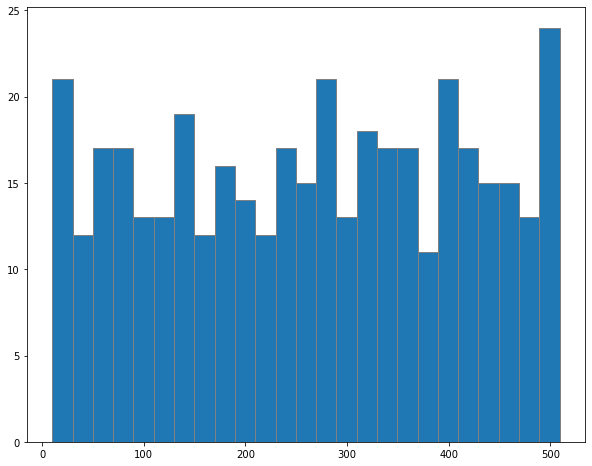

In [58]:
plt.figure(figsize=(10, 8))
plt.hist(feature, bins = 25, edgecolor = 'gray')
plt.show()

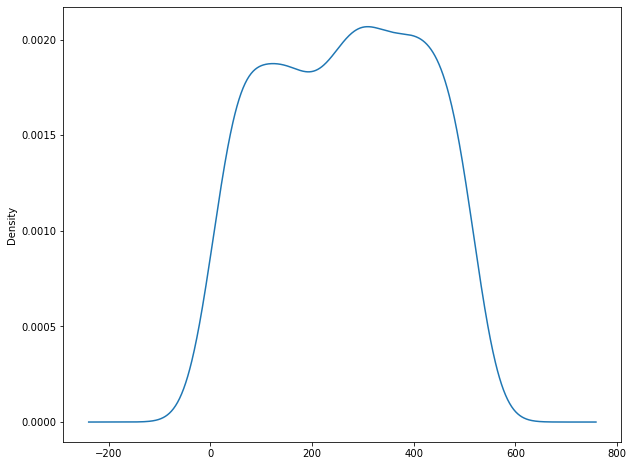

In [59]:
plt.figure(figsize=(10, 8))
feature.plot(kind = 'kde')
plt.show()

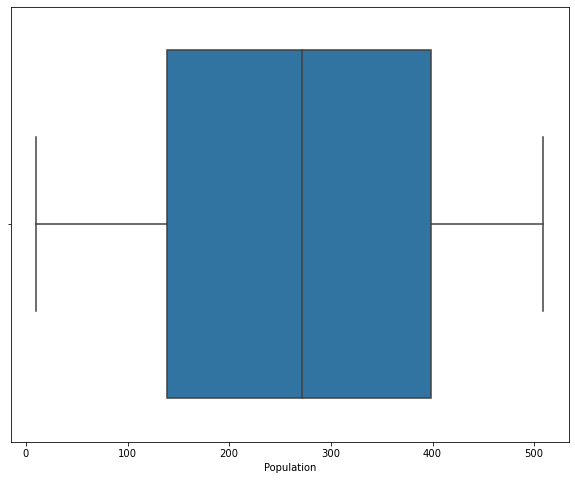

In [60]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=feature, data=data)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 히스토그램을 봤을 때 인구의 수가 다양하다는 것을 알 수 있다.
> - 인구와 판매액에는 차이가 없다고 생각해볼 수 있다. -> 이변량 분석을 통해 알아보기
> - 인구 수가 작은 지역도 있는데 이 지역의 판매액은 작을 것이라 생각해볼 수 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 인구수와 판매액은 차이가 있는지 알아본다.
> - 인구수가 1분위수 미만의 지역은 판매액이 어떻게 되는지 알아본다.

### 4) Price

In [61]:
feature = data['Price']

1) 변수의 비즈니스 의미

> 자사 지역별 판매가격(달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [62]:
feature.isnull().sum()

0

4) 기초통계량(수치화)

In [63]:
feature.describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

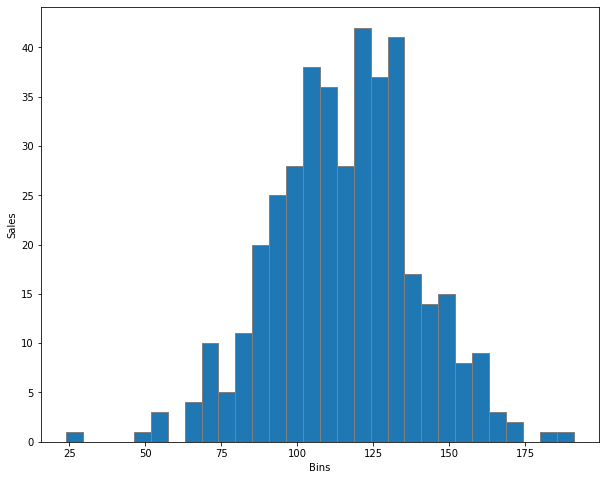

In [67]:
plt.figure(figsize=(10, 8))
plt.hist(feature, bins = 30, edgecolor = 'gray')
plt.xlabel('Bins')
plt.ylabel('Sales')
plt.show()

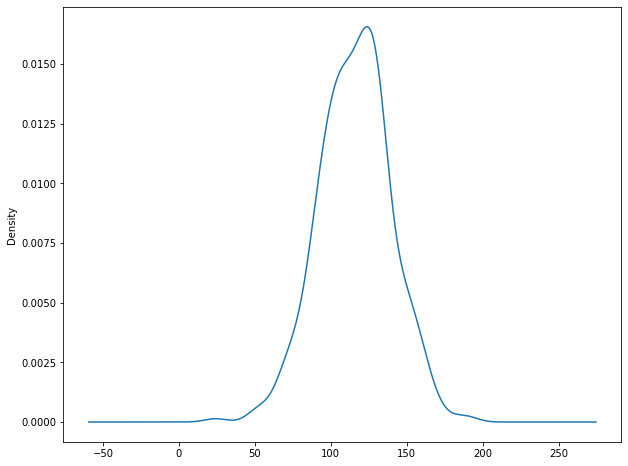

In [65]:
plt.figure(figsize=(10, 8))
feature.plot(kind = 'kde')
plt.show()

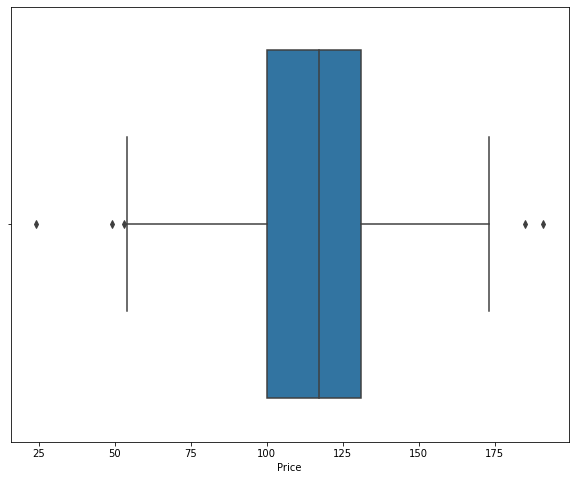

In [66]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=feature, data=data)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 자사 지역별 카시트 판매가격이 평균 115를 기준으로 정규분포 형태를 보인다.
> - 울타리르 벗어나는 이상치 값이 작은쪽에서 3개, 큰쪽에서 2개가 발견된다.
> - -> 왜 이 지역에서는 평균보다 싸게, 비싸게 파는지 알아보고 싶다.
> - 카시트를 싸게 파는 지역은 인구가 많고 수요가 많아서 박리다매 형식으로 판매를 할 것으로 생각해 볼 수 있다.
> - 카시트틀 비싸게 파는 지역은 인구가 적기 때문에 카시트의 가격을 많이 올렸을 것으로 생각해 볼 수 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 다른 지역보다 카시트를 싸고, 비싸게 파는지 이유에 대해 알아보고 싶다.
> -  -> 카시트의 판매가격과 인구와 관련이 있는지 알아보고 싶다.

### 5) ShelveLoc

In [68]:
feature = data['ShelveLoc']

1) 변수의 비즈니스 의미

> 진열상태(Good, Medium, Bad)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [69]:
feature.isnull().sum()

0

4) 기초통계량(수치화)

In [79]:
print('범주별 빈도수')
print(feature.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(feature.value_counts() / len(feature))

범주별 빈도수
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
------------------------------
------------------------------
범주별 비율
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


5) 분포 확인(시각화)

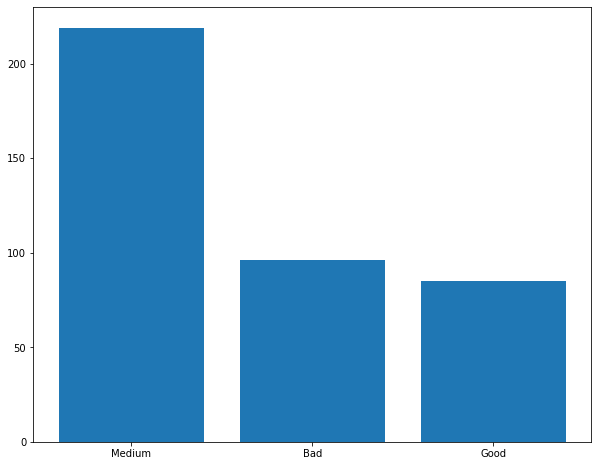

In [71]:
plt.figure(figsize=(10, 8))
cnt = feature.value_counts()
plt.bar(cnt.index, cnt.values)
plt.show()

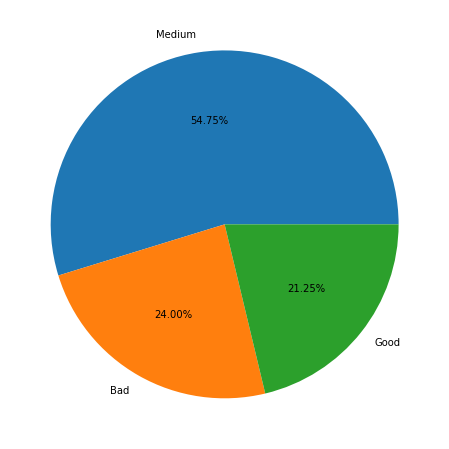

In [72]:
plt.figure(figsize=(10, 8))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 진열 상태가 보통인 상태가 54%로 많은 지역의 진열 상태가 보통이다고 볼 수 있다.
> - 그다음으로 오는 진열 상태가 나쁨인데, 24%를 차지 하기 때문에 본사에서 지역의 판매점을 교육하여 최소 보통, 장기적으로 좋은 상태로 가게 해야할 것이다.
> - 진열상태가 나쁘기 때문에 판매액에 영향이 있을 수 있을 것 같다. 아무래도 아이가 탈 시트이기 때문에 부모님은 청결에 더 신경을 쓸 수밖에 없다.
> - -> 고로 장기적으로 진열 상태를 좋음을 90% 이상으로 올려야 할 것이다.

7) 추가 분석해 볼 사항이 있나요?

> * 진열상태가 나쁨인 지역의 판매액이 낮을 것으로 추정되는데, 그 관계를 알아본다.

### 6) [추가]Age

In [80]:
feature = data['Age']

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [81]:
feature.isnull().sum()

0

4) 기초통계량(수치화)

In [82]:
feature.describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

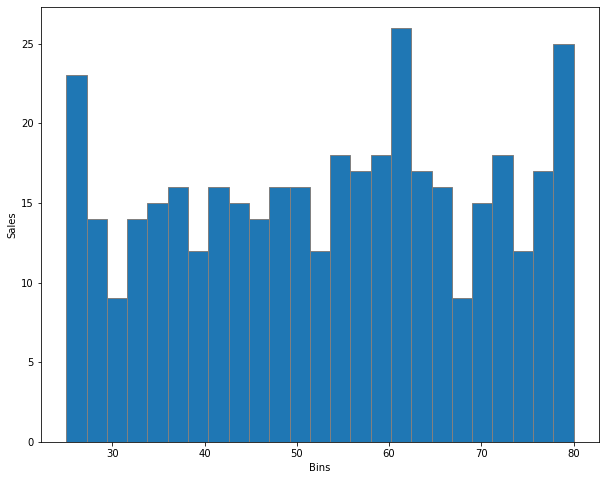

In [90]:
plt.figure(figsize=(10, 8))
plt.hist(feature, bins = 25, edgecolor = 'gray')
plt.xlabel('Bins')
plt.ylabel('Sales')
plt.show()

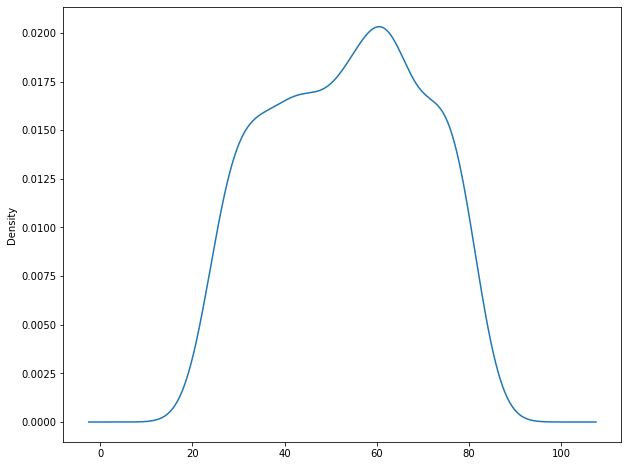

In [84]:
plt.figure(figsize=(10, 8))
feature.plot(kind = 'kde')
plt.show()

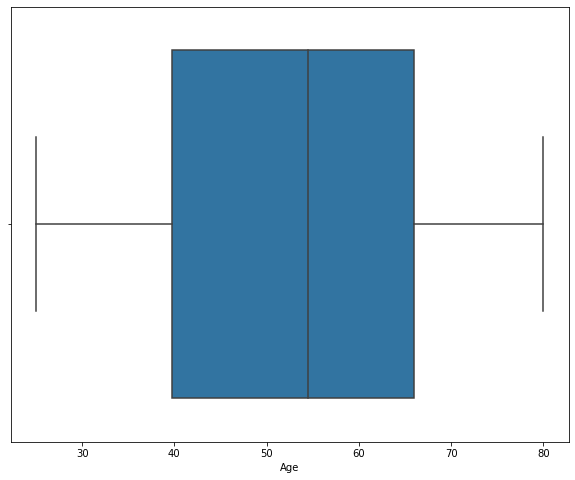

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=feature, data=data)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 

7) 추가 분석해 볼 사항이 있나요?

> * 

### 7) [추가]US

In [91]:
feature = data['US']

1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 여부(Yes, No)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [92]:
feature.isnull().sum()

0

4) 기초통계량(수치화)

In [93]:
print('범주별 빈도수')
print(feature.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(feature.value_counts() / len(feature))

범주별 빈도수
Yes    258
No     142
Name: US, dtype: int64
------------------------------
------------------------------
범주별 비율
Yes    0.645
No     0.355
Name: US, dtype: float64


5) 분포 확인(시각화)

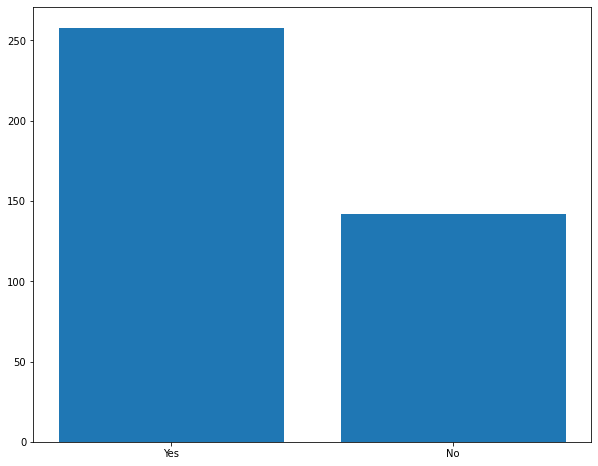

In [94]:
plt.figure(figsize=(10, 8))
cnt = feature.value_counts()
plt.bar(cnt.index, cnt.values)
plt.show()

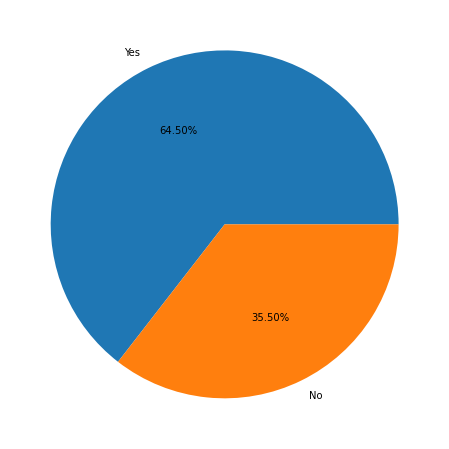

In [95]:
plt.figure(figsize=(10, 8))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 미국에 매장을 두고 있는 지역이 64%로 이 카시트 회사의 주력 지역은 미국임을 짐작할 수 있다.
> - -> 아무래도 미국은 다른 지역보다 차 사용이 많아서 카시트 수요가 많을 것이다.
> - 미국에 매장을 두지 않은 지역은 다른 지역의 집중이 되어 있는지, 전세계적으로 매장이 있는지 알아보고 싶다.

7) 추가 분석해 볼 사항이 있나요?

> * 

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [109]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

① 시각화 : scatter(regplot), jointplot

In [110]:
feature = data['Advertising']

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   Advertising  400 non-null    int64  
 2   Population   400 non-null    int64  
 3   Price        400 non-null    int64  
 4   ShelveLoc    400 non-null    object 
 5   Age          400 non-null    int64  
 6   US           400 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 22.0+ KB


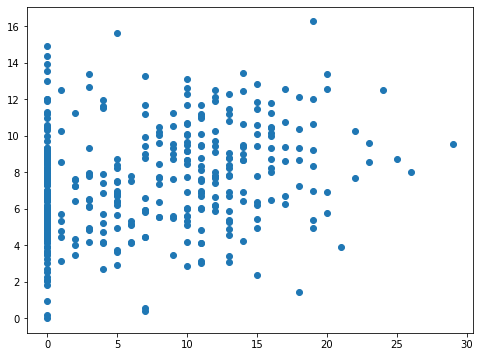

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(feature, target, data=data)
plt.show()

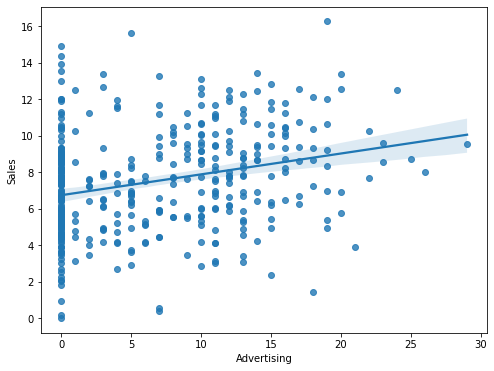

In [153]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Advertising', y='Sales', data=data)
plt.show()

<Figure size 720x576 with 0 Axes>

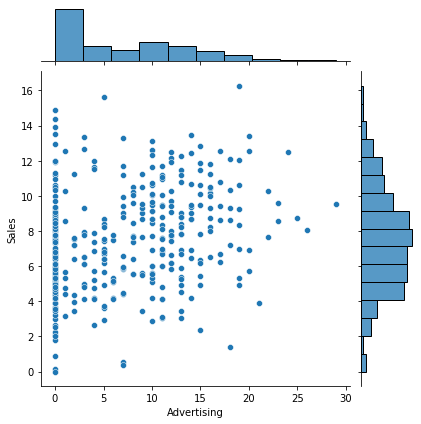

In [104]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [117]:
ps = spst.pearsonr(data['Advertising'], data['Sales']) 

print('상관계수 :', ps[0])
print('p-value :', ps[1])

상관계수 : 0.269506781376902
p-value : 4.377677110302732e-08


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 산점도를 봤을 때 광고비가 증가할 수록 판매액이 증가하는 경향이 약하게 보인다.
> - 광고비와 판매액 사이의 상관계수는 0.270이고, p-value도 0.05보다 작기 때문에
> - 약한 상관관계를 가지고 있다고 보인다.
> - 단변량 분석을 했을 때 광고비와 판매액의 관계가 궁금했는데 둘 사이의 선형성이 잘 보이지 않고, Sales에 다른 요인의 영향이 있을 것으로 추정된다.

##### [추가분석] 광고비의 여부에 따른 판매액 비교

광고비가 있는 지역의 평균 판매액 :  6.8245138888888865
광고비가 없는 지역의 평균 판매액 :  7.874218750000003


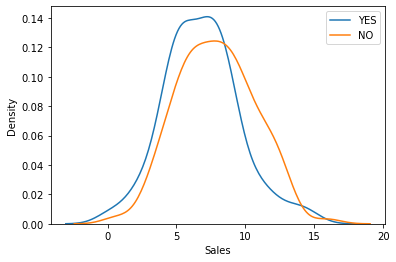

In [177]:
a_y = data[data['Advertising'] <= 0]
a_n = data[data['Advertising'] > 0]

print('광고비가 있는 지역의 평균 판매액 : ', a_y['Sales'].mean())
print('광고비가 없는 지역의 평균 판매액 : ', a_n['Sales'].mean())

sns.kdeplot(a_y['Sales'], label='YES')
sns.kdeplot(a_n['Sales'], label='NO')
plt.legend()
plt.show()

- 광고비의 유무에 따른 판매액의 평균은 1000달러의 차이가 있다.
- 하지만, 광고비를 들이지 않더라도 판매액이 더 높은 지역이 있다.
- 무조건적으로 광고를 한다고 해서 판매에 영향이 있는 것은 아니다.
- 광고비가 없는 지역을 광고비 있는 지역이 벤치마킹 할 수 있도록 분석한다.

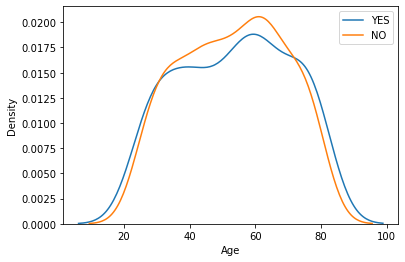

In [171]:
sns.kdeplot(a_y['Age'], label='YES')
sns.kdeplot(a_n['Age'], label='NO')
plt.legend()
plt.show()

- 나이대의 영향이 있어서 광고의 유무가 갈린 것일까?
- -> 분포에서 보듯이 큰 차이가 없고, 비슷한 분포를 보인다.

#### 2) Population -> Sales

① 시각화 : scatter(regplot), jointplot

In [119]:
feauture = data['Population']

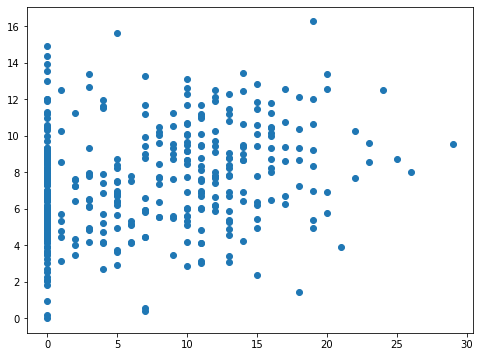

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(feature, target, data=data)
plt.show()

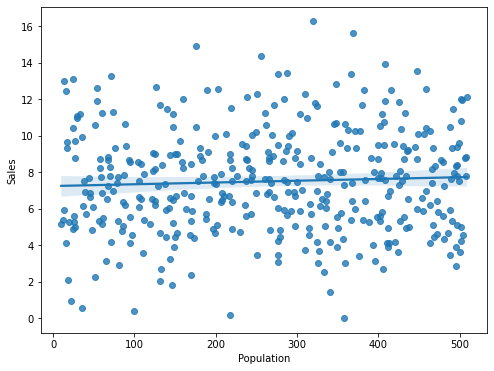

In [152]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Population', y='Sales', data=data)
plt.show()

<Figure size 720x576 with 0 Axes>

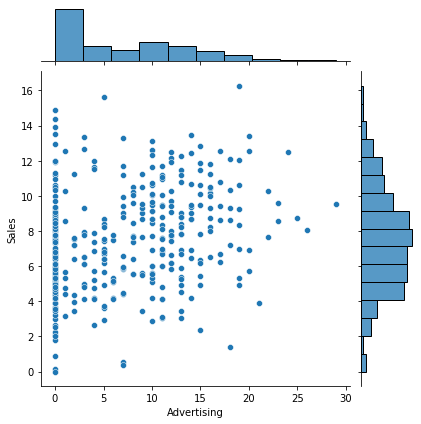

In [121]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [122]:
ps = spst.pearsonr(data['Population'], data['Sales']) 

print('상관계수 :', ps[0])
print('p-value :', ps[1])

상관계수 : 0.0504709844720392
p-value : 0.31398160931903


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 인구와 판매액의 산점도를 봤을 때, 거의 수평인 것을 볼 수 있다.  
> - 이것으로 인구와 판매액은 관련이 거의 없음을 알 수 있다.
> - 수치적으로 봤을 때, 상관계수가 0.05로 거의 0이고, p-value가 0.05보다 크기 때문에
> - 인구와 판매액은 관련이 없다고 볼 수 있다.

#### 3) Price -> Sales

① 시각화 : scatter(regplot), jointplot

In [123]:
feature = data['Price']

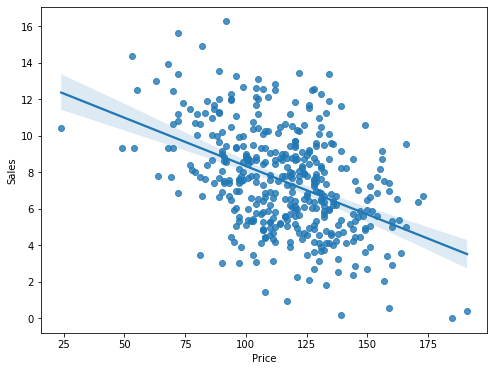

In [144]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Price', y='Sales', data=data)
plt.show()

<Figure size 720x576 with 0 Axes>

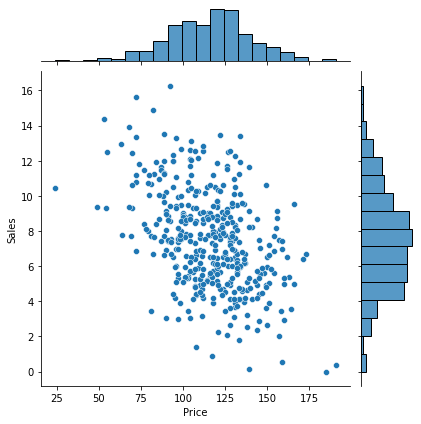

In [125]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [145]:
ps = spst.pearsonr(data['Price'], data['Sales']) 

print('상관계수 :', ps[0])
print('p-value :', ps[1])

상관계수 : -0.4449507278465726
p-value : 7.61818701191294e-21


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 카시트 판매가격이 높을 수록 판매액이 감소하고 있는 경향이 있다.
> - 산점도에서 카시트 가격이 25달러일 때 판매액이 높은 지역이 있다. 이것을 봤을 때, 싸게 많이 파는 박리다매 전략을 썼을 것으로 보인다.
> - 카시트의 판매가격이 높은 지역은 적정 가격으로 낮추게 하는 본사 지침이 필요해 보인다.

#### 4) [추가] Age -> Sales

① 시각화 : scatter(regplot), jointplot

In [147]:
feature = data['Age']

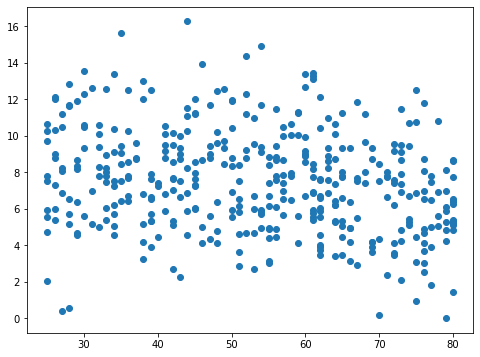

In [148]:
plt.figure(figsize=(8, 6))
plt.scatter(feature, target, data=data)
plt.show()

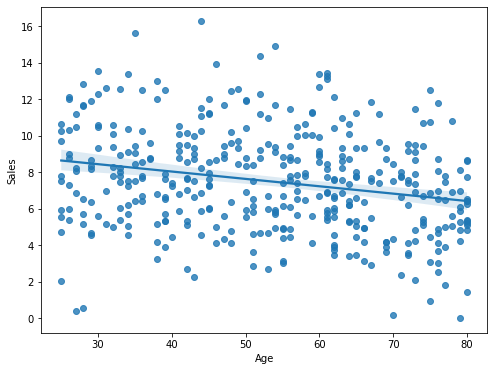

In [154]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Sales', data=data)
plt.show()

<Figure size 720x576 with 0 Axes>

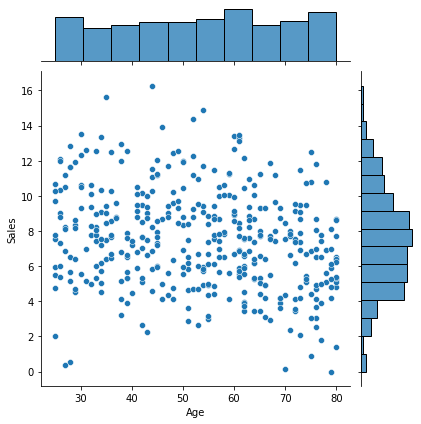

In [149]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [150]:
ps = spst.pearsonr(data['Age'], data['Sales']) 

print('상관계수 :', ps[0])
print('p-value :', ps[1])

상관계수 : -0.2318154396045765
p-value : 2.7889498393711916e-06


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 나이가 높을수록 판매액이 감소하는 경향이 보인다.
> - 카시트가 필요한 고객 대상이 영유아가 있는 부부이기 때문에, 30-40대를 중심으로한 판매전략이 필요해 보인다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

① 시각화 : 평균비교 barplot

In [135]:
feature = data['ShelveLoc']

In [130]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

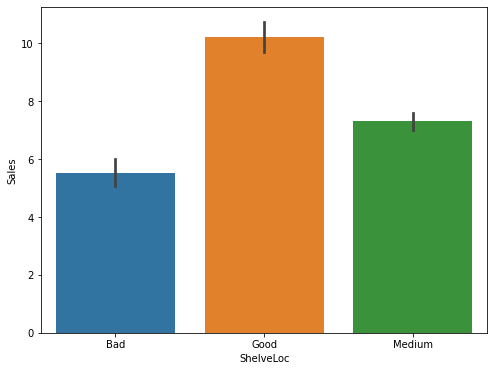

In [139]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='ShelveLoc', y='Sales')
plt.show()

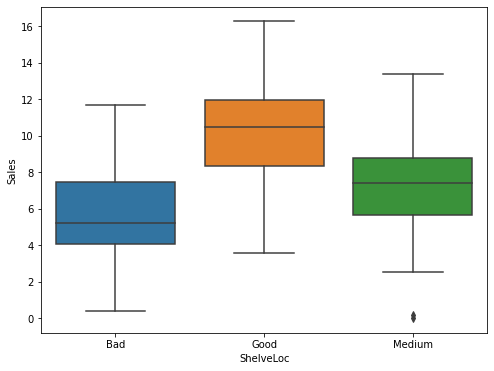

In [134]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='ShelveLoc', y='Sales')
plt.show()

② 수치화 : t-test, anova

In [141]:
s_m = data.loc[data['ShelveLoc']=='Medium', 'Sales'] 
s_b = data.loc[data['ShelveLoc']=='Bad', 'Sales']
s_g = data.loc[data['ShelveLoc']=='Good', 'Sales']

sp = spst.f_oneway(s_m, s_b, s_g)
print('ANOVA 통계량 : ', sp[0])
print('p-value : ', sp[1])

ANOVA 통계량 :  92.22990509910348
p-value :  1.26693609015938e-33


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 진열상태별로 판매액에 유의미한 차이가 있다. 
> - 각 지역의 지점마다 진열상태를 점검하고, 
> - 본사에서는 주기적으로 카시트의 진열방식 등을 교육하는 게 필요해 보인다.

#### 2) [추가] US-> Sales

① 시각화 : 평균비교 barplot

In [155]:
feature = data['US']

In [156]:
data['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

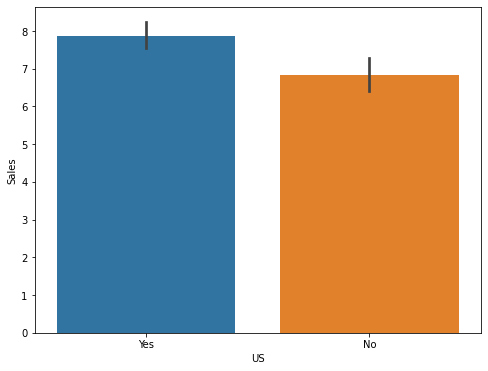

In [157]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='US', y='Sales')
plt.show()

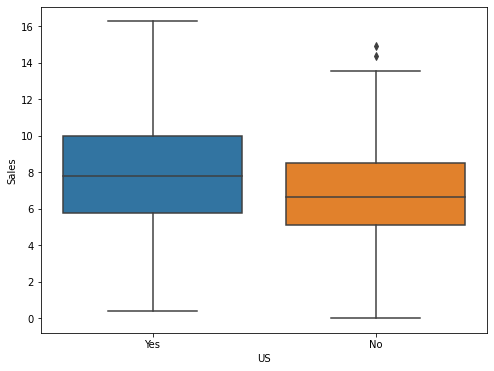

In [158]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='US', y='Sales')
plt.show()

② 수치화 : t-test, anova

In [160]:
u_y = data.loc[data['US']=='Yes', 'Sales'] 
u_n = data.loc[data['US']=='No', 'Sales']

sp = spst.ttest_ind(u_y, u_n)
print('T-Test 통계량 : ', sp[0])
print('p-value : ', sp[1])

T-Test 통계량 :  3.589738747802499
p-value :  0.00037233958701471517


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 미국에 있는 매장이 판매액이 높아 보인다.
> - 미국은 어린이 카시트 규정이 엄격하기 때문에 카시트의 수요가 더 높아보인다.
> - 단변량분석을 했을 때, 미국에 있는 매장비율이 높아서 판매액과 강환관계가 있을 것으로 생각했는데, 이변량 분석 결과 판매액이 많이 차이나보이진 않는다.

## 4.관계 정리

### 1) 강한관계의 변수

- Price -> Sales (-0.445)
- ShelveLoc -> Sales

### 2) 약한관계의 변수

- Advertising -> Sales (0.270)
- Age -> Sales (-0.232)
- US-> Sales

### 3) 관계 없음

- Population -> Sales (0.050)

### 4) 추가 분석